### <center> Задание по регуляризации

Для выполнения данной работы необходимо использовать набор данных из прошлой лабораторной работы.

1. Обучить Ridge, Lasso и ElasticNet регрессии. Посмотреть, становится ли качество модели лучше после применения данных видов регрессии с регуляризацией. Сравнить качество модели
2. Построить кривые обучения регрессии с регуляризацией и обычной линейной регрессией, прокоментровать полученные графики.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/regression.csv')
data.head()

Mounted at /content/drive


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907,1.0,12.0,75377,Hamovniki,2750000,55485.2,14983.92,47.35,40.77,2.31,76.37
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980,2.0,8.0,68630,Lianozovo,9000000,55485.2,14983.92,47.35,40.77,2.31,76.37
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014,3.0,12.0,9553,Poselenie Voskresenskoe,7011550,55485.2,14983.92,47.35,40.77,2.31,76.37
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970,2.0,6.0,78616,Severnoe Butovo,7100000,55485.2,14983.92,47.35,40.77,2.31,76.37
4,8258,2013-05-30,74,46.0,12.0,3.0,24.0,1.0,2004,3.0,9.0,27992,Juzhnoe Medvedkovo,12100000,55485.2,14983.92,47.35,40.77,2.31,76.37


# Линейная регрессия

In [3]:
x = data[['full_sq']]
y = data['price_doc']

reg_model = lr()

In [4]:
reg_model.fit(x, y)

LinearRegression()

In [5]:
pred_1 = reg_model.predict(x)

In [6]:
print('R2: ', r2_score(y, pred_1))

R2:  0.40272744877628297


In [7]:
print('Mean absolute error (MAE)', mean_absolute_error(y, pred_1))

Mean absolute error (MAE) 2427536.071947832


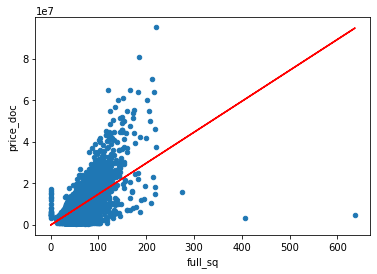

In [8]:
data.plot(x='full_sq',y='price_doc',kind='scatter')
plt.plot(data['full_sq'], pred_1,color='red');

R2: показатель в 0.4 является относительно неплохим, но не лучшим

MAE: относительно стоимости квартир показатель очень большой, что очень плохо

Выбросы: для цены это все, что больше 6 млн, для общей площади - больше 200

In [9]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model2 = lr()
reg_model2.fit(x,y)
pred3 = reg_model2.predict(x)
print('R2: ', r2_score(y, pred3))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred3))

R2:  0.4349392174372788
Mean absolute error (MAE) 2304860.6023075744


In [10]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred3})
residuals.head()

,price,predictions
0,2750000,1.821025e+06
1,9000000,8.332184e+06
2,7011550,1.021133e+07
3,7100000,6.957155e+06
4,12100000,1.165225e+07


In [11]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.821025e+06,9.289751e+05
1,9000000,8.332184e+06,6.678162e+05
2,7011550,1.021133e+07,-3.199783e+06
3,7100000,6.957155e+06,1.428454e+05
4,12100000,1.165225e+07,4.477520e+05


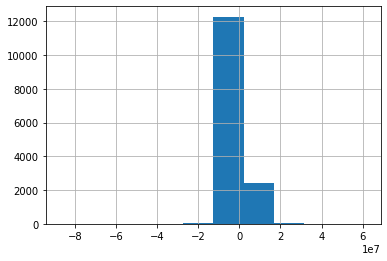

In [12]:
residuals['errors'].hist()

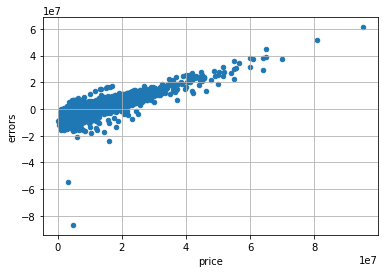

In [13]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Исходя из всего вышеперечисленного могу сделать вывод, что качество модели оставляет желать лучшего (слишком большие показатели ошибок, пусть и R2 неплохой)

Также в графике можно заметить выбросы

Убрал average_life_exp (средняя продолжительность жизни)

In [14]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco']] 
y = data['price_doc']
reg_model3 = lr()
reg_model3.fit(x,y)
pred4 = reg_model3.predict(x)
print('R2: ', r2_score(y, pred4))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred4))

R2:  0.43491447240169456
Mean absolute error (MAE) 2304808.383793458


In [15]:
residuals2 = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred4})
residuals2.head()

,price,predictions
0,2750000,1.883392e+06
1,9000000,8.395562e+06
2,7011550,1.027502e+07
3,7100000,7.021447e+06
4,12100000,1.171867e+07


In [16]:
residuals2['errors'] = residuals2['price']-residuals2['predictions']
residuals2.head()

,price,predictions,errors
0,2750000,1.883392e+06,8.666077e+05
1,9000000,8.395562e+06,6.044384e+05
2,7011550,1.027502e+07,-3.263474e+06
3,7100000,7.021447e+06,7.855333e+04
4,12100000,1.171867e+07,3.813260e+05


In [17]:
tmp = residuals2.copy()
tmp[tmp['errors']<0].mean()

price          5.645996e+06
predictions    8.204285e+06
errors        -2.558289e+06
dtype: float64

In [18]:
tmp[tmp['errors']>=0].mean()

price          9.493762e+06
predictions    7.396732e+06
errors         2.097030e+06
dtype: float64

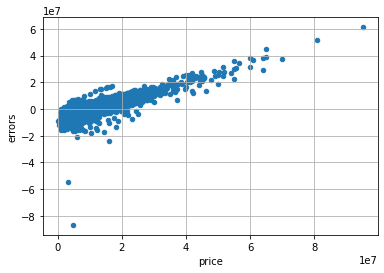

In [19]:
residuals2.plot(x='price',y='errors',kind='scatter',grid=True)

Удаление средней продолжительности жизни не особо сказалось на модели (качество также оставляет желать лучшего)

Убрал стоимость аренды 1-комнатной квартиры

In [20]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model4 = lr()
reg_model4.fit(x,y)
pred5 = reg_model4.predict(x)
print('R2: ', r2_score(y, pred5))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred5))

R2:  0.4349350708436749
Mean absolute error (MAE) 2304894.2928132177


In [21]:
residuals3 = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred5})
residuals3.head()

,price,predictions
0,2750000,1.386925e+06
1,9000000,7.898170e+06
2,7011550,9.777777e+06
3,7100000,6.523064e+06
4,12100000,1.121839e+07


In [22]:
residuals3['errors'] = residuals2['price']-residuals2['predictions']
residuals3.head()

,price,predictions,errors
0,2750000,1.386925e+06,8.666077e+05
1,9000000,7.898170e+06,6.044384e+05
2,7011550,9.777777e+06,-3.263474e+06
3,7100000,6.523064e+06,7.855333e+04
4,12100000,1.121839e+07,3.813260e+05


In [23]:
tmp = residuals3.copy()
tmp[tmp['errors']<0].mean()

price          5.645996e+06
predictions    8.204214e+06
errors        -2.558289e+06
dtype: float64

In [24]:
tmp[tmp['errors']>=0].mean()

price          9.493762e+06
predictions    7.396790e+06
errors         2.097030e+06
dtype: float64

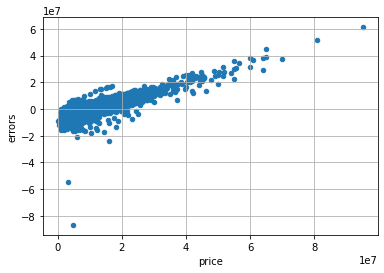

In [25]:
residuals3.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал стоимость аренды 2-комнатной квартиры

In [26]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model5 = lr()
reg_model5.fit(x,y)
pred6 = reg_model5.predict(x)
print('R2: ', r2_score(y, pred6))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred6))

R2:  0.43493126375163116
Mean absolute error (MAE) 2304852.6521077342


In [27]:
residuals4 = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred6})
residuals4.head()

,price,predictions
0,2750000,1.573365e+06
1,9000000,8.084961e+06
2,7011550,9.963781e+06
3,7100000,6.710399e+06
4,12100000,1.140633e+07


In [28]:
residuals4['errors'] = residuals4['price']-residuals4['predictions']
residuals4.head()

,price,predictions,errors
0,2750000,1.573365e+06,1.176635e+06
1,9000000,8.084961e+06,9.150394e+05
2,7011550,9.963781e+06,-2.952231e+06
3,7100000,6.710399e+06,3.896008e+05
4,12100000,1.140633e+07,6.936650e+05


In [29]:
tmp = residuals4.copy()
tmp[tmp['errors']<0].mean()

price          5.645317e+06
predictions    8.202505e+06
errors        -2.557189e+06
dtype: float64

In [30]:
tmp[tmp['errors']>=0].mean()

price          9.495737e+06
predictions    7.397894e+06
errors         2.097844e+06
dtype: float64

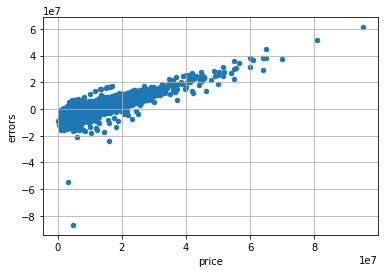

In [31]:
residuals4.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал стоимость аренды 3-комнатной квартиры

In [32]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model6 = lr()
reg_model6.fit(x,y)
pred7 = reg_model6.predict(x)
print('R2: ', r2_score(y, pred7))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred7))

R2:  0.43489735232090654
Mean absolute error (MAE) 2305137.1989678605


In [33]:
residuals5 = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred7})
residuals5.head()

,price,predictions
0,2750000,1.746970e+06
1,9000000,8.257403e+06
2,7011550,1.013430e+07
3,7100000,6.882299e+06
4,12100000,1.157616e+07


In [34]:
residuals5['errors'] = residuals5['price']-residuals5['predictions']
residuals5.head()

,price,predictions,errors
0,2750000,1.746970e+06,1.003030e+06
1,9000000,8.257403e+06,7.425967e+05
2,7011550,1.013430e+07,-3.122754e+06
3,7100000,6.882299e+06,2.177013e+05
4,12100000,1.157616e+07,5.238436e+05


In [35]:
tmp = residuals5.copy()
tmp[tmp['errors']<0].mean()

price          5.639905e+06
predictions    8.198559e+06
errors        -2.558654e+06
dtype: float64

In [36]:
tmp[tmp['errors']>=0].mean()

price          9.498754e+06
predictions    7.401425e+06
errors         2.097329e+06
dtype: float64

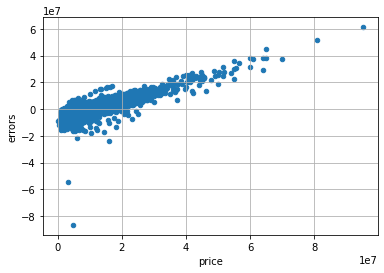

In [37]:
residuals5.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал стоимость потребительской корзины

In [38]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43492784454494815
Mean absolute error (MAE) 2304827.325085801


In [39]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.875527e+06
1,9000000,8.387725e+06
2,7011550,1.026752e+07
3,7100000,7.013340e+06
4,12100000,1.171030e+07


In [40]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.875527e+06,8.744727e+05
1,9000000,8.387725e+06,6.122751e+05
2,7011550,1.026752e+07,-3.255972e+06
3,7100000,7.013340e+06,8.665953e+04
4,12100000,1.171030e+07,3.896987e+05


In [41]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.647651e+06
predictions    8.204046e+06
errors        -2.556395e+06
dtype: float64

In [42]:
tmp[tmp['errors']>=0].mean()

price          9.494767e+06
predictions    7.396431e+06
errors         2.098336e+06
dtype: float64

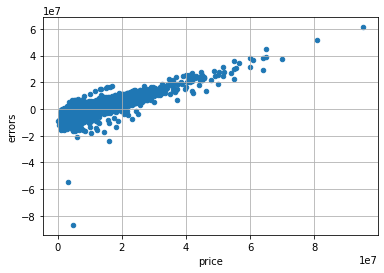

In [43]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал среднюю зарплату

In [44]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43491632289627913
Mean absolute error (MAE) 2304843.0283602695


In [45]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.867571e+06
1,9000000,8.379544e+06
2,7011550,1.025917e+07
3,7100000,7.005383e+06
4,12100000,1.170245e+07


In [46]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.867571e+06,8.824287e+05
1,9000000,8.379544e+06,6.204556e+05
2,7011550,1.025917e+07,-3.247623e+06
3,7100000,7.005383e+06,9.461699e+04
4,12100000,1.170245e+07,3.975476e+05


In [47]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.646049e+06
predictions    8.203993e+06
errors        -2.557944e+06
dtype: float64

In [48]:
tmp[tmp['errors']>=0].mean()

price          9.494191e+06
predictions    7.396872e+06
errors         2.097319e+06
dtype: float64

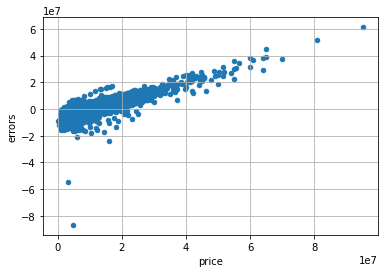

In [49]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал количество населения

In [50]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43489282745891844
Mean absolute error (MAE) 2304184.4341901042


In [51]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.816843e+06
1,9000000,8.326866e+06
2,7011550,1.020975e+07
3,7100000,6.950931e+06
4,12100000,1.165129e+07


In [52]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.816843e+06,9.331573e+05
1,9000000,8.326866e+06,6.731344e+05
2,7011550,1.020975e+07,-3.198199e+06
3,7100000,6.950931e+06,1.490687e+05
4,12100000,1.165129e+07,4.487096e+05


In [53]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.644257e+06
predictions    8.199556e+06
errors        -2.555299e+06
dtype: float64

In [54]:
tmp[tmp['errors']>=0].mean()

price          9.498027e+06
predictions    7.400018e+06
errors         2.098009e+06
dtype: float64

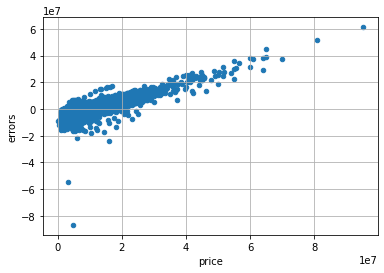

In [55]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

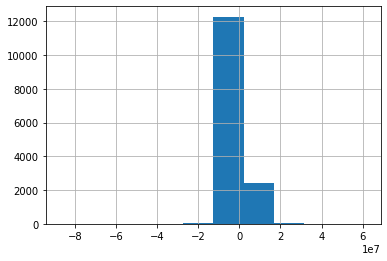

In [56]:
residuals['errors'].hist()
#здесь решил проверить отображение гистограммы (результат ожидаемый, но все же)

Пока модель также нельзя назвать хорошей

Убрал площадь кухни

In [57]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']] 
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43492231734561826
Mean absolute error (MAE) 2304884.235150319


In [58]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.826252e+06
1,9000000,8.332700e+06
2,7011550,1.021287e+07
3,7100000,6.957198e+06
4,12100000,1.165216e+07


In [59]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.826252e+06,9.237478e+05
1,9000000,8.332700e+06,6.673004e+05
2,7011550,1.021287e+07,-3.201318e+06
3,7100000,6.957198e+06,1.428020e+05
4,12100000,1.165216e+07,4.478446e+05


In [60]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.642453e+06
predictions    8.201977e+06
errors        -2.559524e+06
dtype: float64

In [61]:
tmp[tmp['errors']>=0].mean()

price          9.495246e+06
predictions    7.398919e+06
errors         2.096327e+06
dtype: float64

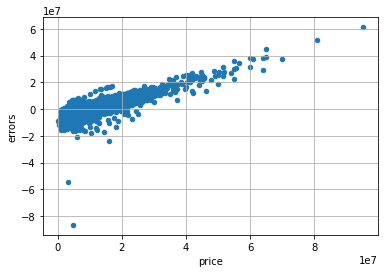

In [62]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал количество комнат

In [63]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4346284090110023
Mean absolute error (MAE) 2303160.8357242234


In [64]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.842166e+06
1,9000000,8.361369e+06
2,7011550,1.014164e+07
3,7100000,6.973780e+06
4,12100000,1.160154e+07


In [65]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.842166e+06,9.078343e+05
1,9000000,8.361369e+06,6.386308e+05
2,7011550,1.014164e+07,-3.130086e+06
3,7100000,6.973780e+06,1.262198e+05
4,12100000,1.160154e+07,4.984590e+05


In [66]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.615355e+06
predictions    8.167990e+06
errors        -2.552635e+06
dtype: float64

In [67]:
tmp[tmp['errors']>=0].mean()

price          9.523679e+06
predictions    7.425570e+06
errors         2.098108e+06
dtype: float64

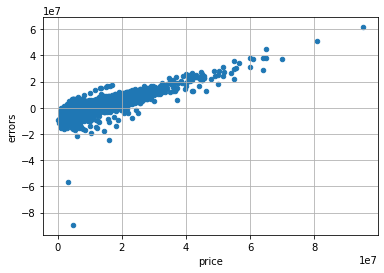

In [68]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал год постройки

In [69]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4330870377885634
Mean absolute error (MAE) 2309061.194194859


In [70]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.645511e+06
1,9000000,8.149590e+06
2,7011550,1.020505e+07
3,7100000,6.779073e+06
4,12100000,1.147893e+07


In [71]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.645511e+06,1.104489e+06
1,9000000,8.149590e+06,8.504095e+05
2,7011550,1.020505e+07,-3.193500e+06
3,7100000,6.779073e+06,3.209268e+05
4,12100000,1.147893e+07,6.210729e+05


In [72]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.620973e+06
predictions    8.194781e+06
errors        -2.573808e+06
dtype: float64

In [73]:
tmp[tmp['errors']>=0].mean()

price          9.500930e+06
predictions    7.407230e+06
errors         2.093700e+06
dtype: float64

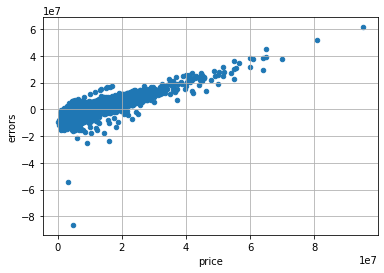

In [74]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал материал стен

In [75]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43315689896258236
Mean absolute error (MAE) 2303944.5783695965


In [76]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.829489e+06
1,9000000,8.517441e+06
2,7011550,9.737520e+06
3,7100000,7.121629e+06
4,12100000,1.184765e+07


In [77]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.829489e+06,9.205111e+05
1,9000000,8.517441e+06,4.825591e+05
2,7011550,9.737520e+06,-2.725970e+06
3,7100000,7.121629e+06,-2.162893e+04
4,12100000,1.184765e+07,2.523463e+05


In [78]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.666505e+06
predictions    8.199169e+06
errors        -2.532664e+06
dtype: float64

In [79]:
tmp[tmp['errors']>=0].mean()

price          9.507615e+06
predictions    7.394501e+06
errors         2.113114e+06
dtype: float64

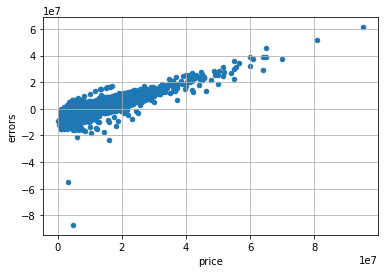

In [80]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал количество этажей в здании

In [81]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4349007243073314
Mean absolute error (MAE) 2305082.0887169125


In [82]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.845746e+06
1,9000000,8.328429e+06
2,7011550,1.017501e+07
3,7100000,6.978254e+06
4,12100000,1.160724e+07


In [83]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.845746e+06,9.042544e+05
1,9000000,8.328429e+06,6.715707e+05
2,7011550,1.017501e+07,-3.163459e+06
3,7100000,6.978254e+06,1.217462e+05
4,12100000,1.160724e+07,4.927553e+05


In [84]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.645121e+06
predictions    8.200268e+06
errors        -2.555147e+06
dtype: float64

In [85]:
tmp[tmp['errors']>=0].mean()

price          9.498738e+06
predictions    7.399138e+06
errors         2.099600e+06
dtype: float64

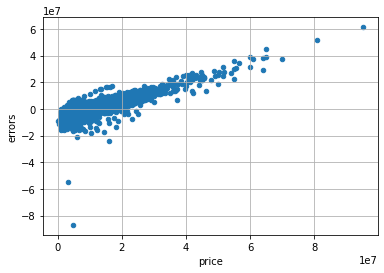

In [86]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал жилищные условия

In [87]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.40958935953147246
Mean absolute error (MAE) 2428571.1236413354


In [88]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.198902e+06
1,9000000,7.614610e+06
2,7011550,1.150614e+07
3,7100000,6.288956e+06
4,12100000,1.101331e+07


In [89]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.198902e+06,1.551098e+06
1,9000000,7.614610e+06,1.385390e+06
2,7011550,1.150614e+07,-4.494587e+06
3,7100000,6.288956e+06,8.110444e+05
4,12100000,1.101331e+07,1.086691e+06


In [90]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.483183e+06
predictions    8.252285e+06
errors        -2.769102e+06
dtype: float64

In [91]:
tmp[tmp['errors']>=0].mean()

price          9.539048e+06
predictions    7.376426e+06
errors         2.162622e+06
dtype: float64

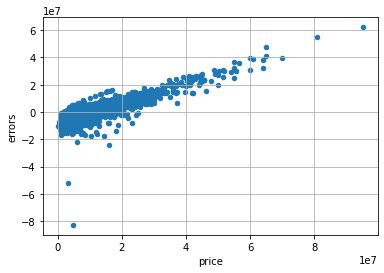

In [92]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Показатель детерминации изменился в худшую сторону; пока модель также нельзя назвать хорошей

Убрал этаж

In [93]:
x = data[['id',	'full_sq',	'life_sq',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.433558725905992
Mean absolute error (MAE) 2306457.0797751625


In [94]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.865949e+06
1,9000000,8.260211e+06
2,7011550,1.053471e+07
3,7100000,6.922021e+06
4,12100000,1.164985e+07


In [95]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.865949e+06,8.840511e+05
1,9000000,8.260211e+06,7.397890e+05
2,7011550,1.053471e+07,-3.523159e+06
3,7100000,6.922021e+06,1.779788e+05
4,12100000,1.164985e+07,4.501520e+05


In [96]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.628143e+06
predictions    8.182139e+06
errors        -2.553996e+06
dtype: float64

In [97]:
tmp[tmp['errors']>=0].mean()

price          9.516036e+06
predictions    7.413373e+06
errors         2.102662e+06
dtype: float64

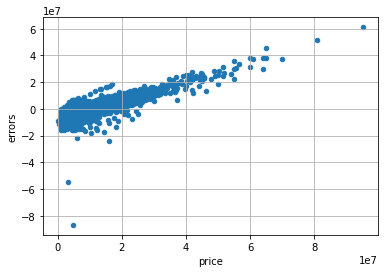

In [98]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал жилую площадь

In [99]:
x = data[['id',	'full_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4348108479608125
Mean absolute error (MAE) 2305019.223367592


In [100]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.820118e+06
1,9000000,8.320833e+06
2,7011550,1.018505e+07
3,7100000,6.947738e+06
4,12100000,1.164094e+07


In [101]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.820118e+06,9.298818e+05
1,9000000,8.320833e+06,6.791673e+05
2,7011550,1.018505e+07,-3.173497e+06
3,7100000,6.947738e+06,1.522625e+05
4,12100000,1.164094e+07,4.590576e+05


In [102]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.644452e+06
predictions    8.202975e+06
errors        -2.558523e+06
dtype: float64

In [103]:
tmp[tmp['errors']>=0].mean()

price          9.495028e+06
predictions    7.397805e+06
errors         2.097222e+06
dtype: float64

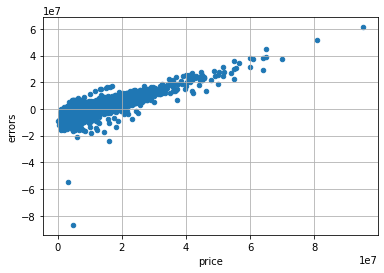

In [104]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Пока модель также нельзя назвать хорошей

Убрал полную площадь

In [105]:
x = data[['id',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.27401986169435266
Mean absolute error (MAE) 2520577.145094825


In [106]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,4.013626e+06
1,9000000,8.138457e+06
2,7011550,1.023075e+07
3,7100000,7.157772e+06
4,12100000,1.176790e+07


In [107]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,4.013626e+06,-1.263626e+06
1,9000000,8.138457e+06,8.615426e+05
2,7011550,1.023075e+07,-3.219205e+06
3,7100000,7.157772e+06,-5.777166e+04
4,12100000,1.176790e+07,3.321024e+05


In [108]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.706789e+06
predictions    8.143489e+06
errors        -2.436700e+06
dtype: float64

In [109]:
tmp[tmp['errors']>=0].mean()

price          9.960641e+06
predictions    7.350207e+06
errors         2.610434e+06
dtype: float64

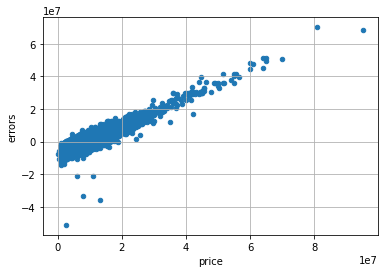

In [110]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

Заметное ухудшение показателя детерминации, что говорит о важности признака; имеются изменения в графике рассеяния; пока модель также нельзя назвать хорошей

Убрал id

In [111]:
x = data[['full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.43491190047646633
Mean absolute error (MAE) 2305029.771740145


In [112]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.742189e+06
1,9000000,8.251531e+06
2,7011550,1.013070e+07
3,7100000,6.875417e+06
4,12100000,1.156759e+07


In [113]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.742189e+06,1.007811e+06
1,9000000,8.251531e+06,7.484695e+05
2,7011550,1.013070e+07,-3.119149e+06
3,7100000,6.875417e+06,2.245834e+05
4,12100000,1.156759e+07,5.324079e+05


In [114]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.642568e+06
predictions    8.201869e+06
errors        -2.559302e+06
dtype: float64

In [115]:
tmp[tmp['errors']>=0].mean()

price          9.495625e+06
predictions    7.398909e+06
errors         2.096717e+06
dtype: float64

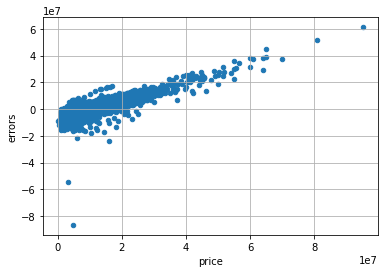

In [116]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

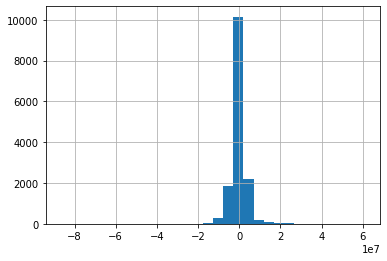

In [117]:
residuals['errors'].hist(bins=30)

Пока модель также нельзя назвать хорошей

Вывод: значительную роль на модель сыграл показатель общей площади квартиры; жилищные условия оказали более слабое, но ощутимое влияние по сравнению с остальными признаками; в целом распределение ошибок нормальное

Далее необходимо выбрать лучшую модель: таковой является та, где все признаки сравниваются с ценой (определял по коэф-ту детерминации)

In [118]:
x = data[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4349392174372788
Mean absolute error (MAE) 2304860.6023075744


In [119]:
residuals = pd.DataFrame({'price':data['price_doc'],
                          'predictions':pred})
residuals.head()

,price,predictions
0,2750000,1.821025e+06
1,9000000,8.332184e+06
2,7011550,1.021133e+07
3,7100000,6.957155e+06
4,12100000,1.165225e+07


In [120]:
residuals['errors'] = residuals['price']-residuals['predictions']
residuals.head()

,price,predictions,errors
0,2750000,1.821025e+06,9.289751e+05
1,9000000,8.332184e+06,6.678162e+05
2,7011550,1.021133e+07,-3.199783e+06
3,7100000,6.957155e+06,1.428454e+05
4,12100000,1.165225e+07,4.477520e+05


In [121]:
tmp = residuals.copy()
tmp[tmp['errors']<0].mean()

price          5.642830e+06
predictions    8.202327e+06
errors        -2.559497e+06
dtype: float64

In [122]:
tmp[tmp['errors']>=0].mean()

price          9.494938e+06
predictions    7.398632e+06
errors         2.096305e+06
dtype: float64

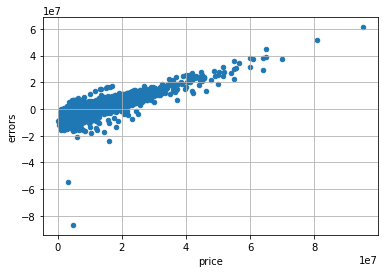

In [123]:
residuals.plot(x='price',y='errors',kind='scatter',grid=True)

In [124]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state = 22)
reg_model = lr()
reg_model.fit(x_train, y_train)
pred_train = reg_model.predict(x_train)

print('Метрики на трейне:')
print('R2: ', r2_score(y_train, pred_train)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_train, pred_train))

pred_test = reg_model.predict(x_test)
print('_'*50)
print('Метрики на тесте:')
print('R2: ', r2_score(y_test, pred_test)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_test, pred_test))

Метрики на трейне:
R2:  0.4314591921627885
Mean absolute error (MAE) 2324906.763330137
__________________________________________________
Метрики на тесте:
R2:  0.18720160894583981
Mean absolute error (MAE) 2283593.3082804796


Показатели метрик нельзя назвать хорошими (особенно на  тесте)

Создаем выборку без выбросов (отталкиваемся от общей площади)

In [125]:
ind = data[(data['full_sq']>200)].index
clean_data = data.drop(ind, axis='index')

In [126]:
x = clean_data[['full_sq']]
y = clean_data['price_doc']

reg_model = lr()
reg_model.fit(x, y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4240399830280731
Mean absolute error (MAE) 2422263.152019456


После очистки однофакторная модель стала немного лучше

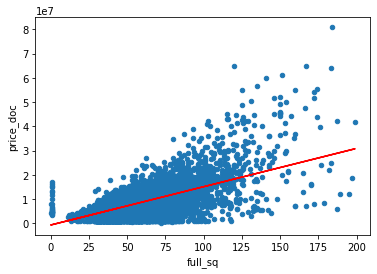

In [127]:
clean_data.plot(x='full_sq',y='price_doc',kind='scatter')
plt.plot(clean_data['full_sq'], pred,color='red');

Избавляемся от "нулей"

In [128]:
ind = clean_data[(clean_data['full_sq']<6)].index #на глаз тяжело определить :)
clean_data1 = clean_data.drop(ind, axis='index')

In [129]:
x = clean_data1[['full_sq']]
y = clean_data1['price_doc']

reg_model = lr()
reg_model.fit(x, y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4298473232110761
Mean absolute error (MAE) 2419622.236104089


Улучшение есть, но едва заметное; продолжим обучение модели уже на данной выборке

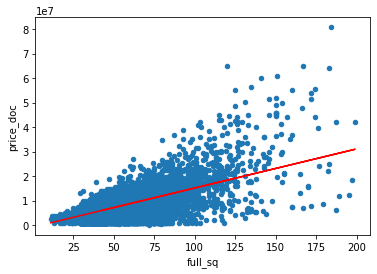

In [130]:
clean_data1.plot(x='full_sq',y='price_doc',kind='scatter')
plt.plot(clean_data1['full_sq'], pred,color='red');

In [131]:
x = clean_data1[['id',	'full_sq',	'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	
          'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	
          'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = clean_data1['price_doc']
reg_model = lr()
reg_model.fit(x,y)
pred = reg_model.predict(x)
print('R2: ', r2_score(y, pred))
print('Mean absolute error (MAE)', mean_absolute_error(y, pred))

R2:  0.4653031605246811
Mean absolute error (MAE) 2298151.309533259


Метрики улучшились, что логично

In [132]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state = 22)
reg_model = lr()
reg_model.fit(x_train, y_train)
pred_train = reg_model.predict(x_train)

print('Метрики на трейне:')
print('R2: ', r2_score(y_train, pred_train)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_train, pred_train))

pred_test = reg_model.predict(x_test)
print('_'*50)
print('Метрики на тесте:')
print('R2: ', r2_score(y_test, pred_test)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_test, pred_test))

Метрики на трейне:
R2:  0.4674609192636817
Mean absolute error (MAE) 2329342.902305948
__________________________________________________
Метрики на тесте:
R2:  0.45101706021501464
Mean absolute error (MAE) 2247626.89277557


Совсем другое дело: трейн изменился (не сильно) в лучшую сторону, тест (довольно заметно) тоже

# Регуляризация

Чего добились в линейной регрессии:

In [137]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state = 22)
reg_model = lr()
reg_model.fit(x_train, y_train)

print("R-квадрат на обучающем наборе: {:.2f}".format(reg_model.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(reg_model.score(x_test, y_test)))

R-квадрат на обучающем наборе: 0.47
R-квадрат на тестовом наборе: 0.45


Значения коэффициентов - огромные (кроме первого, но он тоже не мал)

In [139]:
reg_model.coef_

array([ 7.22804070e+00,  1.81134056e+05, -3.62816297e+03,  3.56068598e+04,
        1.10230654e+06, -7.93890165e+03,  1.26770257e+05, -1.47660268e+00,
       -4.35114609e+05, -1.00248262e+03,  1.09063335e-01, -2.27668146e+02,
        3.70105639e+02, -4.65677092e+04,  8.02798238e+04,  2.33600812e+04,
        4.45457093e+06])

##Ridge (L2)

Если не менять гиперпараметр, показатели останутся прежними

In [180]:
ridge = Ridge().fit(x_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge.score(x_test, y_test)))

R-квадрат на обучающем наборе: 0.47
R-квадрат на тестовом наборе: 0.45


Коэффициенты изменились, но ситуация не улучшлась

In [181]:
ridge.coef_

array([ 3.23306621e+01,  1.81094699e+05, -3.60742953e+03,  3.55623859e+04,
        1.10231080e+06, -7.90710666e+03,  1.26686605e+05, -1.47559034e+00,
       -4.35163362e+05, -1.00313253e+03,  1.10009275e-01, -6.89124927e+01,
        1.31818307e+02, -5.11235151e+04,  5.52598082e+04,  2.22565556e+04,
        1.70045204e+06])

Подберем alpha

In [182]:
for i in range(1, 21):
  ridge = Ridge(alpha=i).fit(x_train, y_train)
  print("alpha = {:}".format(i))
  print("R-квадрат на обучающем наборе: {:.3f}".format(ridge.score(x_train, y_train)))
  print("R-квадрат на тестовом наборе: {:.3f}".format(ridge.score(x_test, y_test)))

alpha = 1
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 2
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 3
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 4
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 5
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 6
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 7
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 8
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 9
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 10
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 11
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 12
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
a

Увеличим шаг

In [174]:
for i in range(0, 10000, 500):
  ridge = Ridge(alpha=i).fit(x_train, y_train)
  print("alpha = {:}".format(i))
  print("R-квадрат на обучающем наборе: {:.3f}".format(ridge.score(x_train, y_train)))
  print("R-квадрат на тестовом наборе: {:.3f}".format(ridge.score(x_test, y_test)))
  print(ridge.coef_)
  print("\n")

alpha = 0
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
[ 7.22804070e+00  1.81134056e+05 -3.62816297e+03  3.56068598e+04
  1.10230654e+06 -7.93890165e+03  1.26770257e+05 -1.47660268e+00
 -4.35114609e+05 -1.00248262e+03  1.09063335e-01 -2.27668146e+02
  3.70105639e+02 -4.65677092e+04  8.02798238e+04  2.33600812e+04
  4.45457093e+06]


alpha = 500
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.445
[ 4.83092497e+01  1.78948182e+05 -4.96030719e+03  3.49584544e+04
  1.00631692e+06 -5.78573221e+03  1.22972144e+05 -1.32692488e+00
 -3.51363623e+05 -8.86867590e+02  1.22501134e-01  2.71514659e+01
 -2.65100038e+01 -4.92839631e+04  3.20304820e+04  2.20847947e+04
  5.38238219e+03]


alpha = 1000
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.437
[ 4.85639748e+01  1.77494869e+05 -6.06579570e+03  3.43740579e+04
  9.26654674e+05 -4.22048373e+03  1.19292293e+05 -1.20436681e+00
 -2.91526129e+05 -7.93080245e+02  1.32942073e-01  2.5975

In [173]:
for i in range(0, 400001, 5000):
  ridge = Ridge(alpha=i).fit(x_train, y_train)
  print("alpha = {:}".format(i))
  print("R-квадрат на обучающем наборе: {:.3f}".format(ridge.score(x_train, y_train)))
  print("R-квадрат на тестовом наборе: {:.3f}".format(ridge.score(x_test, y_test)))
  print(ridge.coef_)
  print("\n")

alpha = 0
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
[ 7.22804070e+00  1.81134056e+05 -3.62816297e+03  3.56068598e+04
  1.10230654e+06 -7.93890165e+03  1.26770257e+05 -1.47660268e+00
 -4.35114609e+05 -1.00248262e+03  1.09063335e-01 -2.27668146e+02
  3.70105639e+02 -4.65677092e+04  8.02798238e+04  2.33600812e+04
  4.45457093e+06]


alpha = 5000
R-квадрат на обучающем наборе: 0.461
R-квадрат на тестовом наборе: 0.387
[ 4.82243751e+01  1.73590348e+05 -1.06334085e+04  3.07599705e+04
  5.73499381e+05  1.27989297e+03  9.56542467e+04 -6.63410860e-01
 -1.09797426e+05 -3.99804361e+02  1.84345474e-01  2.02140008e+01
 -6.45856278e+01 -2.98616559e+04  1.28878933e+04  1.59948953e+04
  5.26156664e+02]


alpha = 10000
R-квадрат на обучающем наборе: 0.456
R-квадрат на тестовом наборе: 0.354
[ 4.73902642e+01  1.72563960e+05 -1.26634482e+04  2.81951781e+04
  3.90380423e+05  3.62024129e+03  7.73630109e+04 -3.84080685e-01
 -5.52305696e+04 -2.01053804e+02  2.13861734e-01  1.71

Довольно интересная картнна: до alpha = 30000 наблюдается спад коэффициента детерминации как на тестовой, так и на обучающей выборке; затем происходит рост R2 теста, R2 обучения также падает; это происходит до alpha = 285000, затем снова происходит спад обоих коэффициентов

Как видно снизу, спад будет только продолжатся

In [167]:
for i in range(400000, 8000001, 400000):
  ridge = Ridge(alpha=i).fit(x_train, y_train)
  print("alpha = {:}".format(i))
  print("R-квадрат на обучающем наборе: {:.3f}".format(ridge.score(x_train, y_train)))
  print("R-квадрат на тестовом наборе: {:.3f}".format(ridge.score(x_test, y_test)))
  print("\n")

alpha = 400000
R-квадрат на обучающем наборе: 0.434
R-квадрат на тестовом наборе: 0.404


alpha = 800000
R-квадрат на обучающем наборе: 0.423
R-квадрат на тестовом наборе: 0.245


alpha = 1200000
R-квадрат на обучающем наборе: 0.412
R-квадрат на тестовом наборе: 0.086


alpha = 1600000
R-квадрат на обучающем наборе: 0.402
R-квадрат на тестовом наборе: -0.031


alpha = 2000000
R-квадрат на обучающем наборе: 0.392
R-квадрат на тестовом наборе: -0.109


alpha = 2400000
R-квадрат на обучающем наборе: 0.382
R-квадрат на тестовом наборе: -0.160


alpha = 2800000
R-квадрат на обучающем наборе: 0.373
R-квадрат на тестовом наборе: -0.190


alpha = 3200000
R-квадрат на обучающем наборе: 0.364
R-квадрат на тестовом наборе: -0.206


alpha = 3600000
R-квадрат на обучающем наборе: 0.356
R-квадрат на тестовом наборе: -0.212


alpha = 4000000
R-квадрат на обучающем наборе: 0.348
R-квадрат на тестовом наборе: -0.212


alpha = 4400000
R-квадрат на обучающем наборе: 0.340
R-квадрат на тестовом наборе: -0

Попробуем пойти в обратную сторону

In [155]:
for i in range(1, 10):
  ridge = Ridge(alpha=i/10).fit(x_train, y_train)
  print("alpha = {:}".format(i/10))
  print("R-квадрат на обучающем наборе: {:.3f}".format(ridge.score(x_train, y_train)))
  print("R-квадрат на тестовом наборе: {:.3f}".format(ridge.score(x_test, y_test)))

alpha = 0.1
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 0.2
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 0.3
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 0.4
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 0.5
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 0.6
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 0.7
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 0.8
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
alpha = 0.9
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451


Что и ожидалось, уменьшение гиперпараметра ничего не изменит относительно изначальной модели

Попробуем использовать CV

In [258]:
lasr_cv = RidgeCV(alphas=[0.1, 0.3, 0.5, 1.0, 5.0, 10.0, 20.0, 100, 1001, 1000, 1500, 2000, 5000, 10000])
lasr_cv.fit(x_train, y_train)
print(f"alpha = {lasr_cv.alpha_}")
print("R-квадрат на обучающем наборе: {:.3f}".format(lasr_cv.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(lasr_cv.score(x_test, y_test)))
print(lasr_cv.coef_)

alpha = 5.0
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
[ 4.33729630e+01  1.81058897e+05 -3.60924954e+03  3.55388527e+04
  1.10155406e+06 -7.87551191e+03  1.26624218e+05 -1.02477437e+00
 -4.34468176e+05 -1.00247913e+03  2.13821411e-01  8.76377583e-01
  2.69455254e+01 -5.30880260e+04  4.41861541e+04  2.17805369e+04
  4.89509172e+05]


Получается, из данной выборки лучше всего подойдет alpha = 5

## Lasso (L1)

In [189]:
lasso = Lasso().fit(x_train, y_train)
print("R-квадрат на обучающем наборе: {:.3f}".format(lasso.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(lasso.score(x_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
Количество использованных признаков: 17


Были задействованы все признаки

In [170]:
lasso.coef_

array([ 1.12970037e+01,  1.81127635e+05, -3.62380119e+03,  3.55990305e+04,
        1.10234822e+06, -7.93345503e+03,  1.26759055e+05, -1.47649088e+00,
       -4.35157343e+05, -1.00269815e+03,  1.09237476e-01, -2.00698020e+02,
        3.30559602e+02, -4.73135173e+04,  7.63002506e+04,  2.32125065e+04,
        3.99045068e+06])

Изменим alpha и количество итераций

In [190]:
lasso001 = Lasso(alpha=0.01).fit(x_train, y_train)  
print("R-квадрат на обучающем наборе: {:.3f}".format(lasso001.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(lasso001.score(x_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
Количество использованных признаков: 17


In [188]:
lasso001 = Lasso(max_iter=100000).fit(x_train, y_train) 
print("R-квадрат на обучающем наборе: {:.3f}".format(lasso001.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(lasso001.score(x_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
Количество использованных признаков: 17


In [191]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)  
print("R-квадрат на обучающем наборе: {:.3f}".format(lasso001.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(lasso001.score(x_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
Количество использованных признаков: 17


Как видно, без изменений (вероятно, это связано с тем, что задейстованы все признаки)

Используем CV

In [260]:
lasr_cv = LassoCV()
lasr_cv.fit(x_train, y_train)
print(f"alpha = {lasr_cv.alpha_}")
print("R-квадрат на обучающем наборе: {:.3f}".format(lasr_cv.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(lasr_cv.score(x_test, y_test)))


alpha = 130956894.34318691
R-квадрат на обучающем наборе: 0.005
R-квадрат на тестовом наборе: 0.006


In [195]:
lasr_cv.coef_

array([46.49672852,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.08975594,  0.        ,  0.        ,
        0.09660315, 20.24968624,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ])

Очень странный выбор alpha, так как R2 в данной ситуации получается по значению значительно меньше изначального

Увеличим количество итераций

In [207]:
lasso001 = Lasso(alpha=130956894.34318691, max_iter=1000000000).fit(x_train, y_train)  
print("R-квадрат на обучающем наборе: {:.3f}".format(lasso001.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(lasso001.score(x_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

R-квадрат на обучающем наборе: 0.005
R-квадрат на тестовом наборе: 0.006
Количество использованных признаков: 4


In [208]:
lasr_cv.coef_

array([46.49672852,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.08975594,  0.        ,  0.        ,
        0.09660315, 20.24968624,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ])

К сожалению, какого-либо результата это не принесло

Зафиксируем количество гиперпараметров alpha

In [266]:
lasr_cv = LassoCV(alphas=[0.1, 0.3, 0.5, 1.0, 5.0, 10.0, 20.0, 100, 1001, 1000, 1500, 2000, 5000, 10000])
lasr_cv.fit(x_train, y_train)
print(f"alpha = {lasr_cv.alpha_}", f"max_iter = {lasr_cv.max_iter}")
print("R-квадрат на обучающем наборе: {:.3f}".format(lasr_cv.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(lasr_cv.score(x_test, y_test)))
print(lasr_cv.coef_)

alpha = 1000.0 max_iter = 1000
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
[ 4.84697436e+01  1.80948305e+05 -3.61481506e+03  3.54565151e+04
  1.10036140e+06 -7.73303785e+03  1.26233856e+05 -1.47176413e+00
 -4.31403326e+05 -9.98918244e+02  1.10954094e-01  2.85121513e+01
 -2.14684993e+01 -5.13405976e+04  3.47905742e+04  2.13270382e+04
  0.00000000e+00]


In [267]:
lasr_cv = LassoCV(alphas=[0.1, 0.3, 0.5, 1.0, 5.0, 10.0, 20.0, 100, 1001, 1000, 1500, 2000, 5000, 10000], max_iter=10000)
lasr_cv.fit(x_train, y_train)
print(f"alpha = {lasr_cv.alpha_}", f"max_iter = {lasr_cv.max_iter}")
print("R-квадрат на обучающем наборе: {:.3f}".format(lasr_cv.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(lasr_cv.score(x_test, y_test)))
print(lasr_cv.coef_)

alpha = 1000.0 max_iter = 10000
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
[ 4.84697436e+01  1.80948305e+05 -3.61481506e+03  3.54565151e+04
  1.10036140e+06 -7.73303785e+03  1.26233856e+05 -1.47176413e+00
 -4.31403326e+05 -9.98918244e+02  1.10954094e-01  2.85121513e+01
 -2.14684993e+01 -5.13405976e+04  3.47905742e+04  2.13270382e+04
  0.00000000e+00]


In [268]:
lasr_cv = LassoCV(alphas=[0.1, 0.3, 0.5, 1.0, 5.0, 10.0, 20.0, 100, 1001, 1000, 1500, 2000, 5000, 10000], max_iter=1000000)
lasr_cv.fit(x_train, y_train)
print(f"alpha = {lasr_cv.alpha_}", f"max_iter = {lasr_cv.max_iter}")
print("R-квадрат на обучающем наборе: {:.3f}".format(lasr_cv.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(lasr_cv.score(x_test, y_test)))
print(lasr_cv.coef_)

alpha = 1000.0 max_iter = 1000000
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
[ 4.84697436e+01  1.80948305e+05 -3.61481506e+03  3.54565151e+04
  1.10036140e+06 -7.73303785e+03  1.26233856e+05 -1.47176413e+00
 -4.31403326e+05 -9.98918244e+02  1.10954094e-01  2.85121513e+01
 -2.14684993e+01 -5.13405976e+04  3.47905742e+04  2.13270382e+04
  0.00000000e+00]


Результат тот же, однако, один из признаков стал равен нулю, что означает его не сильно значимую роль в модели

## ElasticNet

In [226]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.9).fit(x_train, y_train)
print("R-квадрат на обучающем наборе: {:.3f}".format(elastic_net.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(elastic_net.score(x_test, y_test)))

R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.450


Как показала практика, количество alpha лучше фиксировать

In [264]:
el_cv_clf = ElasticNetCV(alphas=[0.1, 0.3, 0.5, 1.0, 5.0, 10.0, 20.0, 100, 1001, 1000, 1500, 2000, 5000, 10000],
                         l1_ratio=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
el_cv_clf.fit(x_train, y_train)

print(f"alpha = {el_cv_clf.alpha_}, l1_ratio = {el_cv_clf.l1_ratio_}")
print("R-квадрат на обучающем наборе: {:.3f}".format(el_cv_clf.score(x_train, y_train)))
print("R-квадрат на тестовом наборе: {:.3f}".format(el_cv_clf.score(x_test, y_test)))
print(el_cv_clf.coef_)

alpha = 1000.0, l1_ratio = 1.0
R-квадрат на обучающем наборе: 0.467
R-квадрат на тестовом наборе: 0.451
[ 4.84697436e+01  1.80948305e+05 -3.61481506e+03  3.54565151e+04
  1.10036140e+06 -7.73303785e+03  1.26233856e+05 -1.47176413e+00
 -4.31403326e+05 -9.98918244e+02  1.10954094e-01  2.85121513e+01
 -2.14684993e+01 -5.13405976e+04  3.47905742e+04  2.13270382e+04
  0.00000000e+00]


Здесь рассматриваются два гиперпараметра и идеальная пара - alpha = 1000 и l1_ratio = 1

## Кривые обучения

Линейная

In [271]:
lin_r2_train = []
lin_r2_test = []

x_train, x_test, y_train, y_test = tts(x, y, random_state=0)

for n in range(1, len(x_train), 10):
    reg_model = lr().fit(x_train[:n], y_train[:n])
    reg_model_train_pred = reg_model.predict(x_train[:n])
    reg_model_test_pred = reg_model.predict(x_test)

    lin_r2_train.append(reg_model.score(x_train[:n], y_train[:n]))
    lin_r2_test.append(reg_model.score(x_test, y_test))

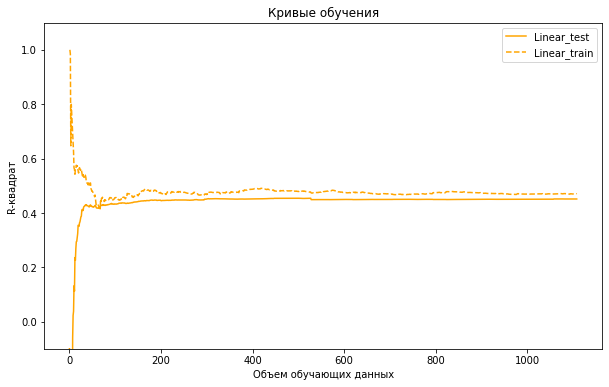

In [295]:
plt.figure(figsize=(10,6))
sns.lineplot(x=[i for i in range(len(lin_r2_test))], y=lin_r2_test, label='Linear_test', color='orange');
sns.lineplot(x=[i for i in range(len(lin_r2_train))], y=lin_r2_train, label='Linear_train', linestyle='dashed', color='orange');
plt.ylim((-0.1, 1.1))
plt.xlabel('Объем обучающих данных')
plt.ylabel('R-квадрат')
plt.title('Кривые обучения');

Ridge

In [276]:
ridge_r2_train = []
ridge_r2_test = []

x_train, x_test, y_train, y_test = tts(x, y, random_state=0)

for n in range(1, len(x_train), 10):
    ridge = Ridge().fit(x_train[:n], y_train[:n])
    ridge_train_pred = ridge.predict(x_train[:n])
    ridge_test_pred = ridge.predict(x_test)
    
    ridge_r2_train.append(ridge.score(x_train[:n], y_train[:n]))
    ridge_r2_test.append(ridge.score(x_test, y_test))

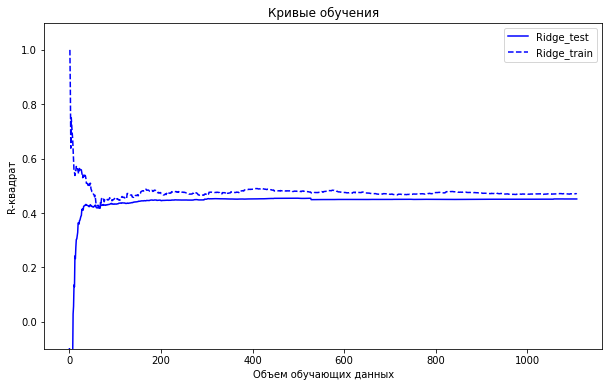

In [296]:
plt.figure(figsize=(10,6))
sns.lineplot(x=[i for i in range(len(ridge_r2_test))], y=ridge_r2_test, label='Ridge_test', color='blue');
sns.lineplot(x=[i for i in range(len(ridge_r2_train))], y=ridge_r2_train, label='Ridge_train', linestyle='dashed', color='blue');
plt.ylim((-0.1, 1.1))
plt.xlabel('Объем обучающих данных')
plt.ylabel('R-квадрат')
plt.title('Кривые обучения');

Lasso

In [281]:
lasso_r2_train = []
lasso_r2_test = []

x_train, x_test, y_train, y_test = tts(x, y, random_state=0)

for n in range(1, len(x_train), 10):
    lasso = Lasso().fit(x_train[:n], y_train[:n])
    lasso_train_pred = lasso.predict(x_train[:n])
    lasso_test_pred = lasso.predict(x_test)

    lasso_r2_train.append(lasso.score(x_train[:n], y_train[:n]))
    lasso_r2_test.append(lasso.score(x_test, y_test))

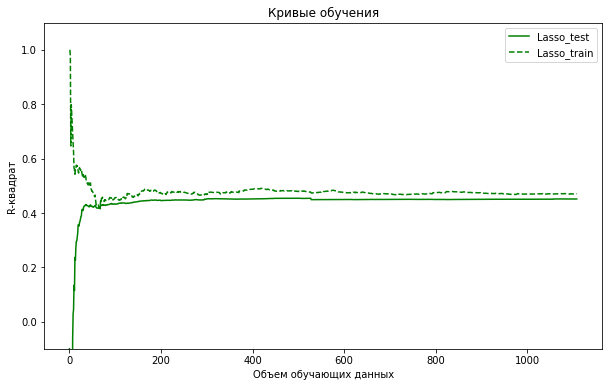

In [282]:
plt.figure(figsize=(10,6))
sns.lineplot(x=[i for i in range(len(lasso_r2_test))], y=lasso_r2_test, label='Lasso_test', color='green');
sns.lineplot(x=[i for i in range(len(lasso_r2_train))], y=lasso_r2_train, label='Lasso_train', linestyle='dashed', color='green');
plt.ylim((-0.1, 1.1))
plt.xlabel('Объем обучающих данных')
plt.ylabel('R-квадрат')
plt.title('Кривые обучения');

ElasticNet

In [283]:
elastic_net_r2_train = []
elastic_net_r2_test = []

x_train, x_test, y_train, y_test = tts(x, y, random_state=0)

for n in range(1, len(x_train), 10):
    elastic_net = ElasticNet().fit(x_train[:n], y_train[:n])
    elastic_net_train_pred = elastic_net.predict(x_train[:n])
    elastic_net_test_pred = elastic_net.predict(x_test)

    elastic_net_r2_train.append(elastic_net.score(x_train[:n], y_train[:n]))
    elastic_net_r2_test.append(elastic_net.score(x_test, y_test))

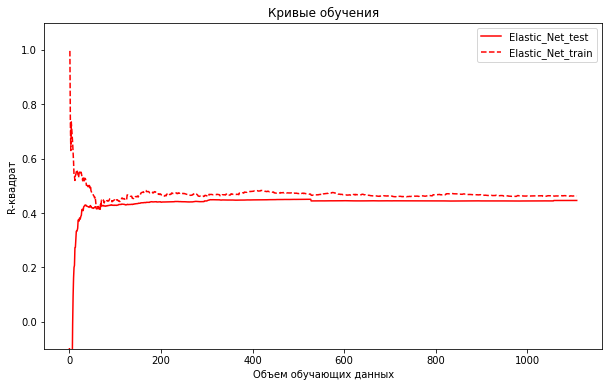

In [297]:
plt.figure(figsize=(10,6))
sns.lineplot(x=[i for i in range(len(elastic_net_r2_test))], y=elastic_net_r2_test, label='Elastic_Net_test', color='red');
sns.lineplot(x=[i for i in range(len(elastic_net_r2_train))], y=elastic_net_r2_train, label='Elastic_Net_train', linestyle='dashed', color='red');
plt.ylim((-0.1, 1.1))
plt.xlabel('Объем обучающих данных')
plt.ylabel('R-квадрат')
plt.title('Кривые обучения');

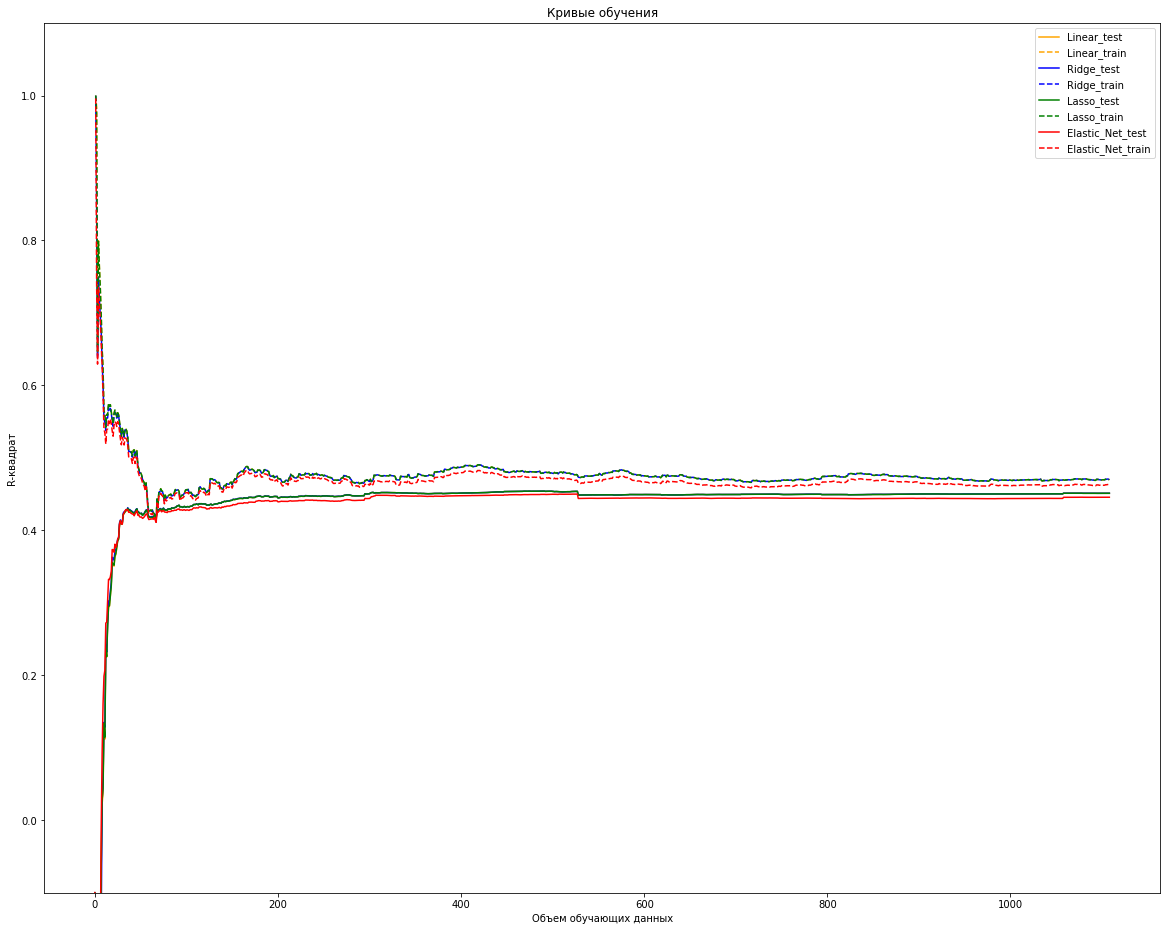

In [299]:
plt.figure(figsize=(20,16))

sns.lineplot(x=[i for i in range(len(lin_r2_test))], y=lin_r2_test, label='Linear_test', color='orange');
sns.lineplot(x=[i for i in range(len(lin_r2_train))], y=lin_r2_train, label='Linear_train', linestyle='dashed', color='orange');

sns.lineplot(x=[i for i in range(len(ridge_r2_test))], y=ridge_r2_test, label='Ridge_test', color='blue');
sns.lineplot(x=[i for i in range(len(ridge_r2_train))], y=ridge_r2_train, label='Ridge_train', linestyle='dashed', color='blue');

sns.lineplot(x=[i for i in range(len(lasso_r2_test))], y=lasso_r2_test, label='Lasso_test', color='green');
sns.lineplot(x=[i for i in range(len(lasso_r2_train))], y=lasso_r2_train, label='Lasso_train', linestyle='dashed', color='green');

sns.lineplot(x=[i for i in range(len(elastic_net_r2_test))], y=elastic_net_r2_test, label='Elastic_Net_test', color='red');
sns.lineplot(x=[i for i in range(len(elastic_net_r2_train))], y=elastic_net_r2_train, label='Elastic_Net_train', linestyle='dashed', color='red');

plt.ylim((-0.1, 1.1))
plt.xlabel('Объем обучающих данных')
plt.ylabel('R-квадрат')
plt.title('Кривые обучения');

Как можно заметить, графики практически не отличаются друг от друга. Вероятно, это из-за того, что данные для анализа были предварительно очищены (секция "Линейная регрессия")